# Abgabe 3 

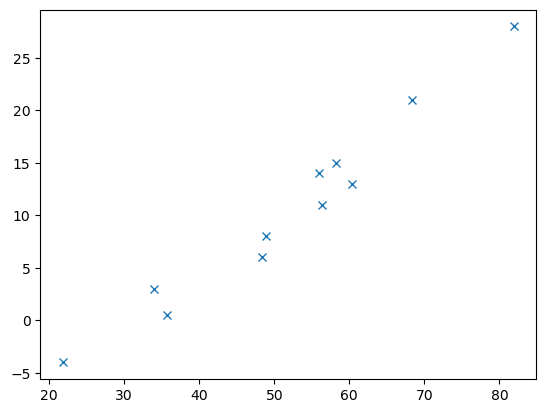

In [5]:
# Aufgabe 1
import numpy as np
values = np.loadtxt('vl5_data.csv')
import matplotlib.pyplot as plt
t_u = np.array(values[:,1], dtype='f')
t_c = np.array(values[:,0], dtype='f')
plt.plot(t_u, t_c, 'x')

In [6]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

def dloss_fn(t_p, t_c):
    return 2*(t_p-t_c) / t_p.size

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return np.stack([dloss_dw.sum(), dloss_db.sum()])

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for i in range(n_epochs):
        t_p = model(t_u, *params)
        print(f'loss_fn = {loss_fn(t_p, t_c)}')
        grad = grad_fn(t_u, t_c, t_p, *params)
        params = params - learning_rate * grad
    return params


loss_fn = 80.36434173583984
loss_fn = 37.57491683959961
loss_fn = 30.871076583862305
loss_fn = 29.756196975708008
loss_fn = 29.50714874267578
loss_fn = 29.3924560546875
loss_fn = 29.298828125
loss_fn = 29.208717346191406
loss_fn = 29.119413375854492
loss_fn = 29.030487060546875
loss_fn = 28.941875457763672
loss_fn = 28.85356330871582
loss_fn = 28.76555633544922
loss_fn = 28.67784881591797
loss_fn = 28.590431213378906
loss_fn = 28.503320693969727
loss_fn = 28.41649627685547
loss_fn = 28.329973220825195
loss_fn = 28.243741989135742
loss_fn = 28.157804489135742
loss_fn = 28.07215118408203
loss_fn = 27.986793518066406
loss_fn = 27.9017276763916
loss_fn = 27.81695556640625
loss_fn = 27.732465744018555
loss_fn = 27.648256301879883
loss_fn = 27.564342498779297
loss_fn = 27.480712890625
loss_fn = 27.397363662719727
loss_fn = 27.314292907714844
loss_fn = 27.231508255004883
loss_fn = 27.149005889892578
loss_fn = 27.066789627075195
loss_fn = 26.984844207763672
loss_fn = 26.903173446655273
loss_fn

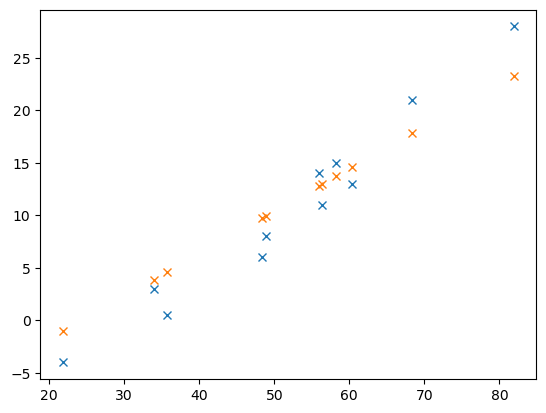

7.843382


In [8]:
w = np.ones(1)
b = np.zeros(1)
learning_rate = 1e-2

t_un = t_u * 0.1
params = training_loop(500, learning_rate, np.array([w[0], b[0]]), t_un, t_c)

t_p = model(t_un, *params)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.show()
print(loss_fn(t_p, t_c))


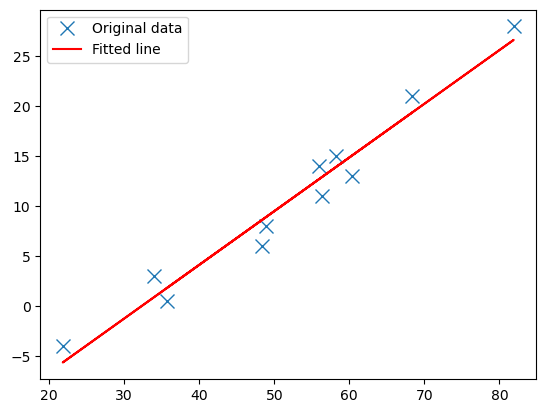

In [7]:
# Aufgabe 2
x_mean = np.mean(t_u)
y_mean = np.mean(t_c)
zähler = np.sum((t_u-x_mean)*(t_c-y_mean))
nenner = np.sum((t_u-x_mean)**2)
alpha_1 = zähler/nenner
alpha_0 = y_mean - alpha_1 * x_mean

plt.plot(t_u, t_c, 'x', label='Original data', markersize=10)
plt.plot(t_u, alpha_0 + np.multiply(alpha_1,t_u) , 'r', label='Fitted line')
plt.legend()
plt.show()